# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

To say 3 conclusions of this study please read the next lines
    -Capomulin is a Drug Regimen effective because as time goes by with the treatment the volume of the tumor decreases. 
    -I would add but it is mostly seen a graph for each treatment and showing if the volume decreases in time as the table shows so we can know easier if all the treatments work in reducing the tumor volume as with Capomulin that it is shown that it works. (in the first table is shown with Ramicane as well that through time the Volume decreases)
    -Last one almost obvious with higher volume of the tumor higher weight of the mouse. Even we cannot assume is the only cause we can assume a relation is undenible. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
print(combined_data.head(5))

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [4]:
#Checking the number of mice.
number_mice = len(combined_data['Mouse ID'].unique())
print(number_mice)

249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
print("Duplicate mice IDs:", duplicate_mice_ids)

Duplicate mice IDs: ['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]

# Print the data for the duplicate mouse IDs
print("Data for Duplicate Mice:")
print(duplicate_mouse_data)

Data for Duplicate Mice:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female      

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID'])

# Print the cleaned DataFrame
print(cleaned_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
50       s508     Ramicane    Male           1          17          0   
60       f966    Capomulin    Male          16          17          0   
65       m546     Ramicane    Male          18          16          0   
75       z578     Ramicane    Male          11          16          0   
85       j913     Ramicane  Female           4          17          0   
95       u364    Capomulin    Male          18          17          0   
105      n364     Ramicane    Male           4          17          0   
115      y793    Capomulin    Male          17     

In [8]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(cleaned_data['Mouse ID'].unique())
print(number_mice)

249


## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by 'Drug Regimen'
grouped = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate summary statistics
summary_stats = grouped.agg(['mean', 'median', 'var', 'std'])

# Calculate SEM (Standard Error of the Mean)
sem_values = grouped.apply(lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))

# Add SEM to the summary DataFrame
summary_stats['SEM'] = sem_values

print(summary_stats)

                   mean     median        var       std       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

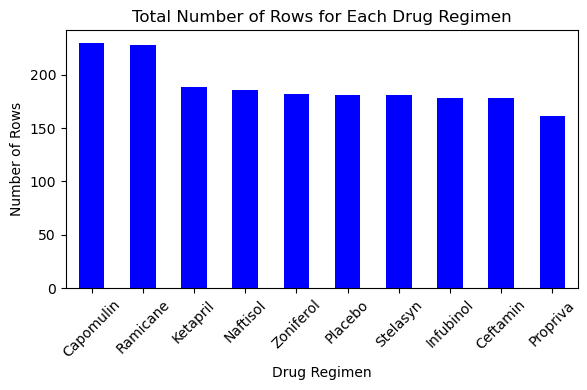

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Assuming 'combined_data' contains your dataset

# Count the number of rows for each drug regimen
drug_counts = combined_data['Drug Regimen'].value_counts()

# Create a bar plot
drug_counts.plot(kind='bar', color='blue', figsize=(6, 4))

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

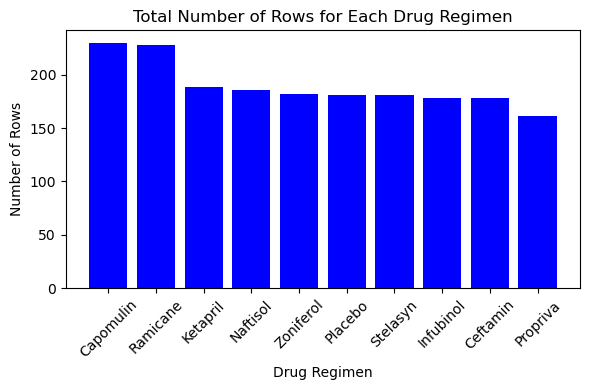

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = combined_data['Drug Regimen'].value_counts()

# Extract drug names and corresponding counts
drugs = drug_counts.index
counts = drug_counts.values

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(drugs, counts, color='blue')

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

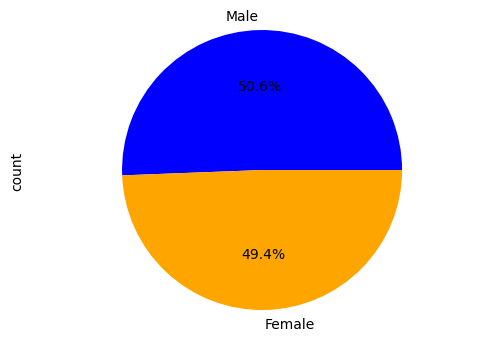

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = combined_data['Sex'].value_counts()

# Create a pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'Orange'], startangle=360, figsize=(6, 4))

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

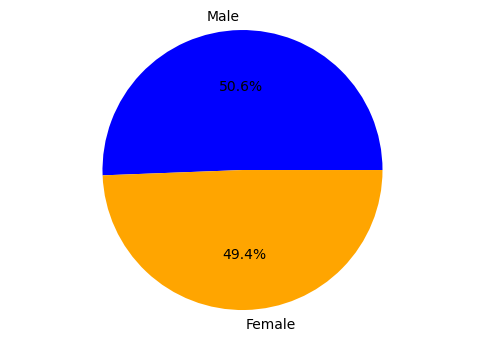

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = combined_data['Sex'].value_counts()

# Create a pie plot
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=0)



# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

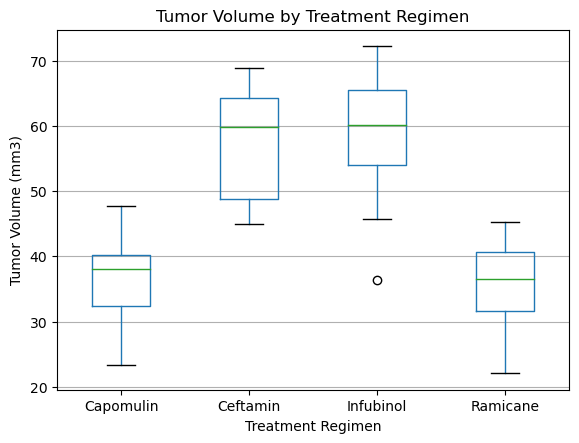

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max()
merged_data = pd.merge(combined_data, last_timepoint, on=['Mouse ID', 'Timepoint'])
regimens_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(regimens_of_interest)]

boxplot = filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

plt.title('Tumor Volume by Treatment Regimen')
plt.suptitle('')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Regimen')


plt.grid(axis='y')

plt.show()



In [33]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


# Step 1: Put treatments into a list for a loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Step 3: Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate quartiles
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")

# Step 4: Plot boxplots


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [54]:
infubinol_index = treatments.index('Infubinol')

# Print the tumor volume data for "Infubinol"
print(tumor_vol_data[infubinol_index])

# Count occurrences of "Infubinol" in the tumor volume data
infubinol_counts = tumor_vol_data[infubinol_index].count()
print("Count of Infubinol occurrences:", infubinol_counts)

49     67.973419
50     65.525743
57     57.031862
58     66.083066
70     72.226731
74     36.321346
82     60.969711
90     62.435404
95     60.918767
112    67.289621
124    66.196912
128    62.117279
146    47.010364
150    60.165180
162    55.629428
163    45.699331
174    54.656549
185    55.650681
206    46.250112
209    54.048608
211    51.542431
218    50.005138
223    58.268442
237    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64
Count of Infubinol occurrences: 25


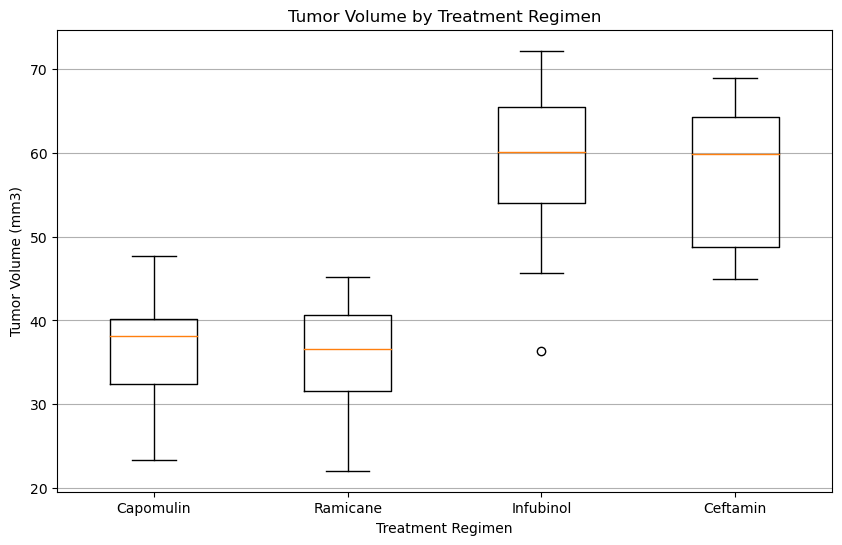

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Tumor Volume by Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Regimen')
plt.grid(axis='y')
plt.show()

## Line and Scatter Plots

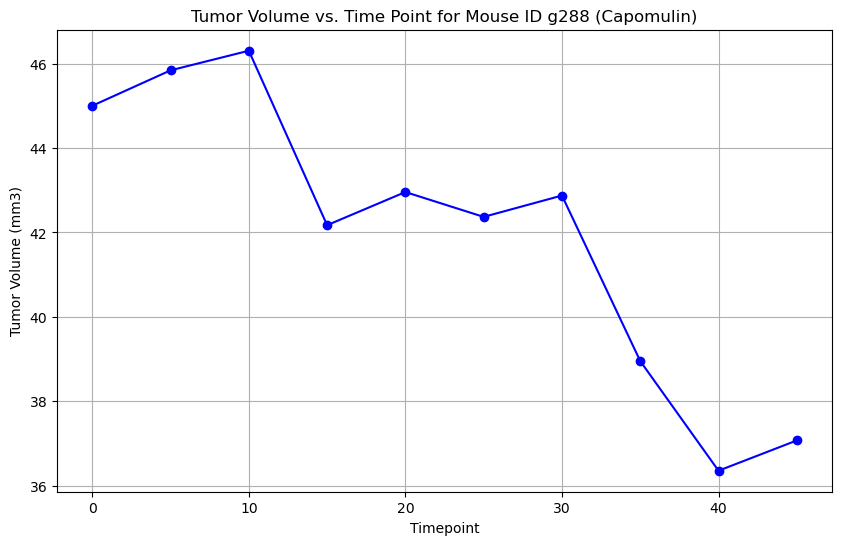

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]
capomulin_data = capomulin_data.sort_values(by='Timepoint')
mouse_id = capomulin_data['Mouse ID'].iloc[-1]
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')


plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

plt.show()

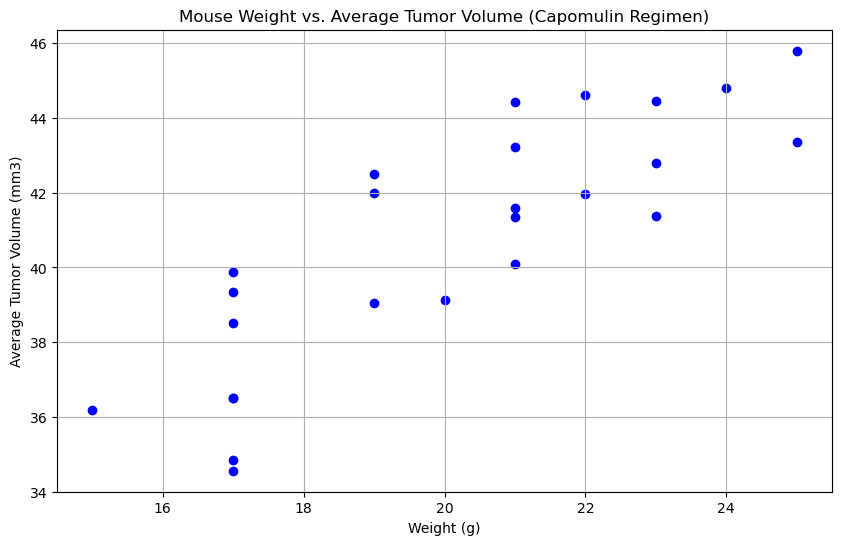

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, capomulin_avg_tumor_volume, color='blue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.841936342469472
Slope = 0.9544396890241049 intercept = 21.552160532685008 r_value = 0.8419363424694721 p_value = 1.3225722434712404e-07


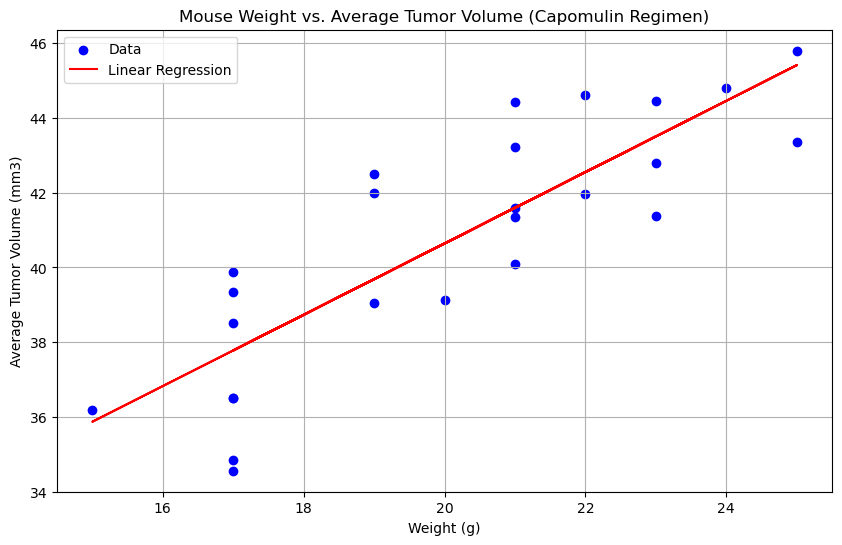

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
from scipy.stats import pearsonr, linregress
correlation_coefficient, _ = pearsonr(mouse_weights, capomulin_avg_tumor_volume)
print("Correlation coefficient between mouse weight and average tumor volume:", correlation_coefficient)


slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, capomulin_avg_tumor_volume)
print("Slope =", slope, "intercept =",intercept,"r_value =", r_value,"p_value =", p_value)


plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, capomulin_avg_tumor_volume, color='blue', label='Data')


x_values = np.array(mouse_weights)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Linear Regression')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

plt.show()